<br>
<br>
<center>
    
# 泰坦尼克号Titanic生存预测

</center>
<img src='../static/img/logo.jpg' align='right' style="width:260px;height:80 px"/>
<br>

![](img/titanic.jpeg)

### Titanic Challenges经典题源自那次震惊世界的沉船事故，由于救生艇的数量有限，最终哪些人可以获救呢？
题目来源:[Titanic](https://www.kaggle.com/c/titanic)

### 在本次实验中，我们将遵循机器学习项目的构建流程，按照如下步骤完成实验：
* 1. 分析问题
* 2. 获取数据
* 3. 数据处理
* 4. 模型训练
    * 逻辑回归
* 5. 模型评估
### 本次实验中，我们将会使用到的知识点如下：
* 1. python的基本语法
* 2. numpy的多维数组
* 3. pandas的DataFrame结构
* 4. matplotlib的bar，hist图表
* 5. sklearn的逻辑回归算法

## 1、分析问题
#### 根据一些特征，如Titanic的乘客的年龄，性别，客舱等级等等，来预测某一名乘客最终是否从这次劫难中生还，接下来让我们一步步来利用机器学习的方法来进行一下数据分析和预测吧！

## 2、获取数据
#### 从Kaggle官网下载train.csv和test.csv，这两个表格分别代表训练集和测试集，在data目录下已经下载好数据

In [169]:
#数据分析
import pandas as pd 
#科学计算
import numpy as np 
#读取训练数据
data_train = pd.read_csv('./data/train.csv',encoding='UTF-8')
#查看训练数据
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 我们看到，总共有11列，其中Survived字段表示的是该乘客是否获救，其余都是乘客的个人信息，包括：

PassengerId => 乘客ID  
Pclass => 乘客等级(1/2/3等舱位)  
Name => 乘客姓名    
Sex => 性别    
Age => 年龄  
SibSp => 堂兄弟/妹个数  
Parch => 父母与小孩个数   
Ticket => 船票信息  
Fare => 票价    
Cabin => 客舱  
Embarked => 登船港口  


In [139]:
# 数据统计
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


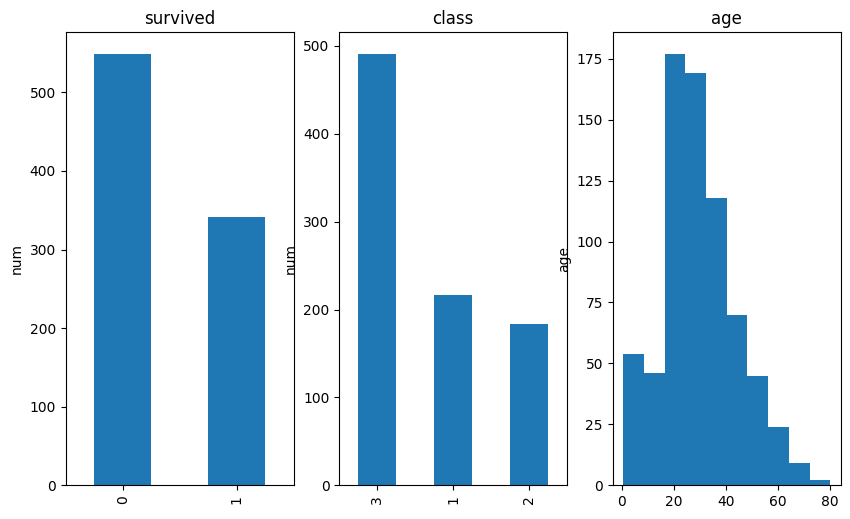

In [185]:
# 图形库
import matplotlib.pyplot as plt

# 创建画布
fig = plt.figure(figsize=(10,6),dpi=100)
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

# 创建坐标系
plt.subplot2grid((1,3),(0,0))             # 在一张大图里分列几个小图
data_train.Survived.value_counts().plot(kind='bar')# 柱状图 
plt.title("survived") # 标题
plt.ylabel("num")  

plt.subplot2grid((1,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel("num")
plt.title("class")

plt.subplot2grid((1,3),(0,2))
data_train.Age.plot(kind="hist")
plt.ylabel("age")                       
plt.title("age")

# 显示
plt.show()

#### 我们在图上可以看出来，
* 被救的人有200多人，不到半数；
* 3等舱乘客最多；
* 年龄在20-40之间的人数最多


#### 属性与获救结果的关联统计

<Figure size 432x288 with 0 Axes>

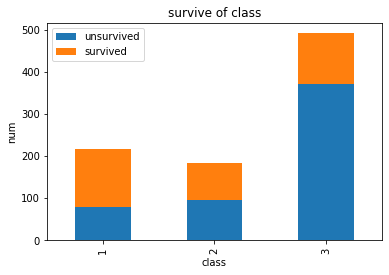

In [141]:
# 看看各乘客等级的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train["Pclass"][data_train.Survived == 0].value_counts()
Survived_1 = data_train["Pclass"][data_train.Survived == 1].value_counts()
df=pd.DataFrame({'unsurvived':Survived_0,'survived':Survived_1})
df.plot(kind='bar', stacked=True)
plt.title("survive of class")
plt.xlabel("class") 
plt.ylabel("num") 
plt.show()

<Figure size 432x288 with 0 Axes>

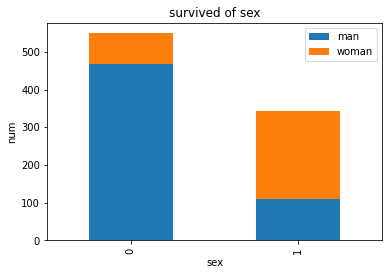

In [142]:
# 看看各性别的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'man':Survived_m, u'woman':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"survived of sex")
plt.xlabel(u"sex") 
plt.ylabel(u"num")
plt.show()

## 3、数据处理

#### 通常我们会对数据做预处理，包含缺失值处理，异常值处理,还会进行一些必要的特征工程，包含特征提取，特征预处理，特征降维等手段

In [174]:
# 判断是否有缺失值
# 为了降低难度，我们将不会进行太多的数据预处理
pd.notnull(data_train)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,False,True
887,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,True,True,False,True,True,True,True,False,True
889,True,True,True,True,True,True,True,True,True,True,True,True


## 4、模型训练

#### 逻辑回归建模
我们把需要的feature字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模。

In [180]:
from sklearn import linear_model

# 用正则取出我们要的属性值
train_df = data_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.values

# y即第0列：Survival结果
y = train_np[:, 0]

# X即第1列及以后：特征属性值
X = train_np[:, 1:]

# fit到LogisticRegression之中
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)

clf

LogisticRegression(penalty='l1', solver='liblinear', tol=1e-06)

## 5、模型评估

In [181]:
# 我们通过测试数据来检测逻辑回归模型的效果
data_test = pd.read_csv("./data/test.csv")
data_test.head()
pd.notnull(data_test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,False,True
4,True,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
413,True,True,True,True,False,True,True,True,True,False,True
414,True,True,True,True,True,True,True,True,True,True,True
415,True,True,True,True,True,True,True,True,True,False,True
416,True,True,True,True,False,True,True,True,True,False,True


In [182]:
test_df = data_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
# 对测试数据做预测
predictions = clf.predict(test_df)
predictions.astype(np.int32)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [183]:
from sklearn.model_selection import cross_val_score
# 验证准确率 
clf_scores = cross_val_score(clf, X, y, cv=10)
clf_scores.mean()

0.620649188514357

### 我们通过逻辑回归的算法进行验证之后发现，准确率为0.620649188514357，同学们可以通过更多的算法去实现预测，将会获得更好的准确率